In [65]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import numpy as np

In [66]:
url = 'https://raw.githubusercontent.com/kedeisha1/Challenges/main/coaster_db.csv'
df = pd.read_csv(url, sep=',')
df.head()

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,...,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed,...,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,NaN,0,2.9
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN


In [67]:
# How many columns and rows are in the dataset?
print(df.shape)
print("1087 rows and 56 columns")

(1087, 56)
1087 rows and 56 columns


In [68]:
# Is there any missing data?
missing = df.isna().sum().sort_values(ascending=False)
print("There is a lot of missing data")
missing

There is a lot of missing data


Fastrack available               1068
Restraint Style                  1065
Restraints                       1063
Opened                           1060
Name                             1052
Theme                            1043
Flash Pass available             1041
Flash Pass Available             1037
Acceleration                     1027
Fast Lane available              1018
Single rider line available      1006
Website                          1000
Replaced by                       999
Soft opening date                 991
Soft opening date.1               991
Must transfer from wheelchair     981
height_ft                         916
Replaced                          914
Closing date                      851
Track layout                      752
Max vertical angle                730
Gforce_clean                      725
G-force                           725
Cost                              705
Park section                      600
Drop                              593
Capacity    

In [69]:
# Display the summary statistics of the numeric columns using the describe method.
df.describe()

,Inversions,year_introduced,latitude,longitude,speed1_value,speed_mph,height_value,height_ft,Inversions_clean,Gforce_clean
count,932.000000,1087.000000,812.000000,812.000000,937.000000,937.000000,965.000000,171.000000,1087.000000,362.000000
mean,1.547210,1994.986201,38.373484,-41.595373,53.850374,48.617289,89.575171,101.996491,1.326587,3.824006
std,2.114073,23.475248,15.516596,72.285227,23.385518,16.678031,136.246444,67.329092,2.030854,0.989998
min,0.000000,1884.000000,-48.261700,-123.035700,5.000000,5.000000,4.000000,13.100000,0.000000,0.800000
25%,0.000000,1989.000000,35.031050,-84.552200,40.000000,37.300000,44.000000,51.800000,0.000000,3.400000
50%,0.000000,2000.000000,40.289800,-76.653600,50.000000,49.700000,79.000000,91.200000,0.000000,4.000000
75%,3.000000,2010.000000,44.799600,2.778100,63.000000,58.000000,113.000000,131.200000,2.000000,4.500000
max,14.000000,2022.000000,63.230900,153.426500,240.000000,149.100000,3937.000000,377.300000,14.000000,12.000000


In [70]:
'''Rename the following columns:
coaster_name ➡️  Coaster_Name
year_introduced ➡️ Year_Introduced
opening_date_clean ➡️ Opening_Date
speed_mph ➡️ Speed_mph
height_ft ➡️ Height_ft
Inversions_clean ➡️ Inversions
Gforce_clean ➡️ Gforce'''
df.rename(columns={"coaster_name":"Coaster_Name", 
                   "year_introduced":"Year_Introduced", 
                   "opening_date_clean":"Opening_Date", 
                   "speed_mph":"Speed_mph", 
                   "height_ft":"Height_ft",
                   "Inversions_clean":"Inversions",
                   "Gforce_clean":"Gforce"},
                   inplace=True)

In [71]:
# Are there any duplicated rows?
print(f"There are {df.duplicated().sum()} duplicated rows")

There are 0 duplicated rows


In [72]:
# What are the top 3 years with the most roller coasters introduced?
# df["Opening_Date"].value_counts(ascending=False)
df["Opening_Date"] = pd.to_datetime(df["Opening_Date"])
df["year"] = df["Opening_Date"].dt.year
most_roller_coaster_year = df["year"].value_counts(ascending=False)
print("The top 3 years with most roller coaster instroduced are:")
print(most_roller_coaster_year.head(3))

The top 3 years with most roller coaster instroduced are:
1999.0    38
2000.0    36
2002.0    26
Name: year, dtype: int64


In [81]:
# What is the average speed? Also display a plot to show it’s distribution.
avg_speed = df["Speed_mph"].mean()
print(avg_speed)
fig = px.histogram(df, x="Speed_mph", color_discrete_sequence=["red"])
fig.show()

48.617289220917826


                 Inversions  Year_Introduced  latitude  longitude  \
Inversions         1.000000         0.211003 -0.009815   0.061589   
Year_Introduced    0.211003         1.000000 -0.070982   0.175913   
latitude          -0.009815        -0.070982  1.000000  -0.298488   
longitude          0.061589         0.175913 -0.298488   1.000000   
speed1_value       0.163419         0.210191 -0.121847   0.301179   
Speed_mph          0.252209         0.204853 -0.063757   0.051063   
height_value       0.094811         0.087687 -0.004265  -0.092764   
Height_ft          0.171330         0.232150  0.011492   0.159733   
Inversions         1.000000         0.228758 -0.014043   0.087160   
Gforce             0.356865        -0.066657  0.042871   0.016485   
year               0.238472         0.963965 -0.070100   0.179283   

                 speed1_value  Speed_mph  height_value  Height_ft  Inversions  \
Inversions           0.163419   0.252209      0.094811   0.171330    1.000000   
Year_Intr

C:\Users\riain\AppData\Local\Temp\ipykernel_3552\3633877177.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

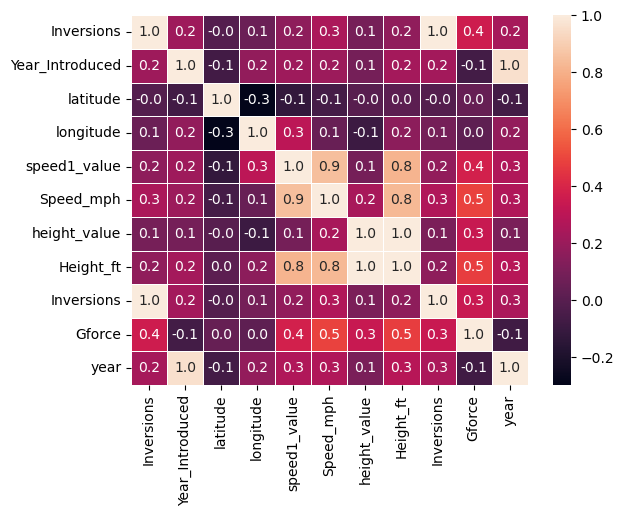

In [ ]:
# Explore the feature relationships. Are there any positively or negatively correlated relationships?
corr = df.corr()
print(corr)
sns.heatmap(corr, annot=True, fmt=".1f", linewidth=.5)
print()


In [85]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Create the heatmap trace
trace = go.Heatmap(
    z=corr_matrix.values,  # Use the correlation matrix as the values
    x=corr_matrix.columns,  # Use the column names as x-axis labels
    y=corr_matrix.columns,  # Use the column names as y-axis labels
    colorscale='Viridis',  # Specify the color scale
    
)

# Create the layout
layout = go.Layout(title='Correlation Heatmap')

# Create the figure and add the trace
fig = go.Figure(data=[trace], layout=layout)

# Show the figure
fig.show()

C:\Users\riain\AppData\Local\Temp\ipykernel_3552\1858285088.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

